#Project 3

For the project, we have combined 2 powerful techniques for signal classification. Using UMAP (Uniform Manifold Approximation and Projection) along with LSTM (Long Short-Term Memory) networks for EEG signal classification offers a unique and powerful approach.


>*Why did we choose these particular techniques:*

UMAP is a non-linear dimensionality reduction technique that can capture complex relationships in high-dimensional data. EEG signals are inherently high-dimensional, and traditional linear techniques may struggle to preserve the intricate structures present in the data. It is also known for its ability to preserve both local and global structures in the data. This is crucial in EEG signal analysis as it allows the algorithm to capture both fine-grained patterns within individual EEG signals and broader patterns that might span across multiple signals.

EEG signals often exhibit temporal dependencies, where the pattern at one time point is related to patterns in nearby time points. LSTMs, being a type of recurrent neural network (RNN), are well-suited to capture and learn from these temporal dependencies. They can model sequences effectively, making them suitable for EEG signal analysis where time dynamics are crucial.

>*Benefits:*

UMAP is used as a pre-processing step to provide a condensed representation of EEG signals. This condensed representation is then be fed into an LSTM network, allowing the model to learn sequential patterns and dependencies from the UMAP-transformed features. This two-step process can enhance the model's ability to capture both spatial and temporal aspects of the data.

The combination of UMAP and LSTM can potentially improve the generalization of the model. UMAP helps reduce the dimensionality and extract relevant features, while LSTM, being a powerful sequence model, can generalize well to unseen temporal patterns.

Also, UMAP provides visualizations that can aid in the interpretability of the reduced-dimensional space. Understanding the structure of the data in the reduced space can offer insights into the patterns discovered by the model.




In [ ]:
!pip install wget

In [ ]:
import os
import wget
import zipfile

def download_and_extract_data(data_mapping, base_folder_path):
    os.makedirs(base_folder_path, exist_ok=True)

    for url, folder_name in data_mapping.items():
        zip_file_path = os.path.join(base_folder_path, f"{folder_name}.zip")
        extracted_folder_path = os.path.join(base_folder_path, folder_name)

        os.makedirs(extracted_folder_path, exist_ok=True)

        wget.download(url, zip_file_path)

        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extracted_folder_path)

        os.remove(zip_file_path)

if __name__ == "__main__":
    base_folder_path = "/content/drive/MyDrive/ukbonn_data/"

    data_mapping = {
        "https://www.ukbonn.de/site/assets/files/21874/z.zip": "A",
        "https://www.ukbonn.de/site/assets/files/21872/o.zip": "B",
        "https://www.ukbonn.de/site/assets/files/21871/n.zip": "C",
        "https://www.ukbonn.de/site/assets/files/21870/f.zip": "D",
        "https://www.ukbonn.de/site/assets/files/21875/s.zip": "E"
    }


    download_and_extract_data(data_mapping, base_folder_path)


This code is responsible for
the loading and preprocessing of data from text files. It operates on a specified root directory containing subfolders corresponding to different target folders. For each target folder, the script reads text files, normalizes the data, and saves the processed data into new files.

Function: load_and_preprocess_data(base_folder_path, data_mapping)
Parameters:

1. base_folder_path: The root directory containing subfolders with data.
2. data_mapping: A dictionary mapping target folders to corresponding subfolder names.


Processing Steps:

1. Loop Over Target Folders:
For each target folder specified in data_mapping:
Construct the subfolder path using the base_folder_path and target folder name.
Loop over a range of file numbers
Build the file name for each file in the format "{subfolder_name}{file_number:03d}.txt".
Check if the file exists, and if so, proceed with data processing.

2. Data Processing:
Open each file and load data using numpy from the text file.
Normalize the data by subtracting the mean and dividing by the standard deviation.
Save the processed data into a new file with a naming convention "{target_folder}preprocessed{file_number:03d}.txt".
3. Error Handling:
Catch and print any exceptions that occur during the data processing.

#Explore and Visualize EEG Signals:


This code block defines a Python function, explore_data, that iterates through specified target folders, loads the first three signal files from each folder, and creates individual plots to visualize the EEG signals. The script sets a base folder path and a data mapping dictionary, calling the function to initiate the exploration and visualization of sample EEG signals.








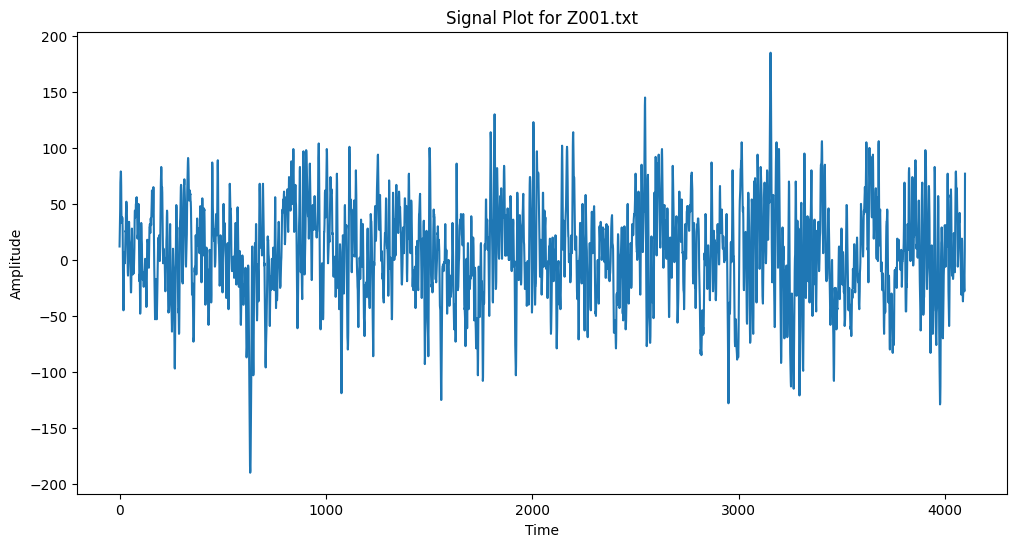

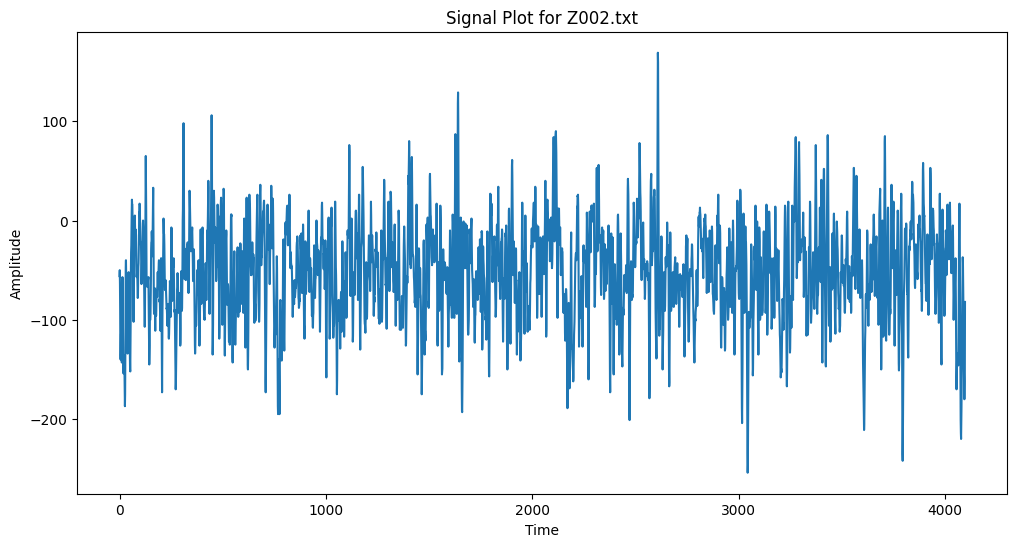

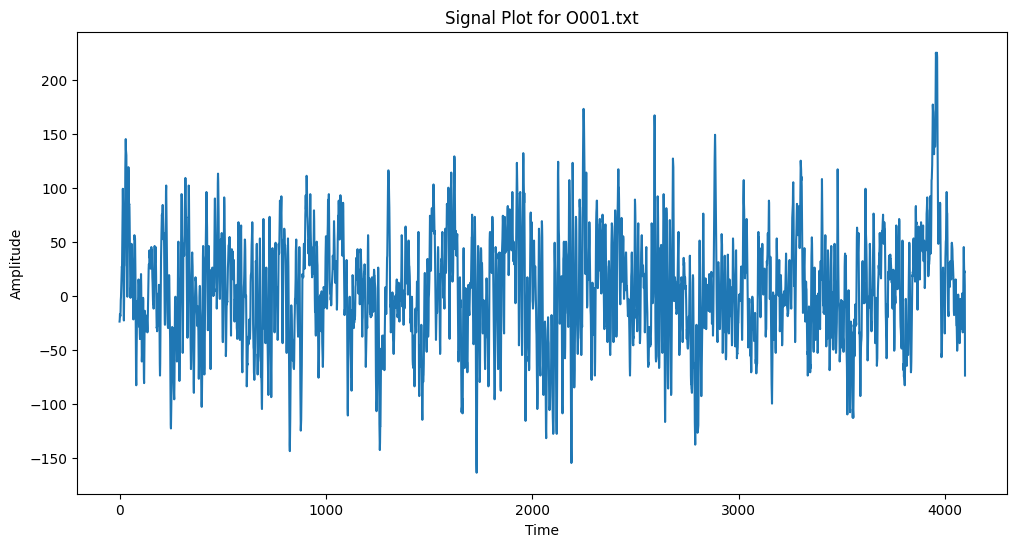

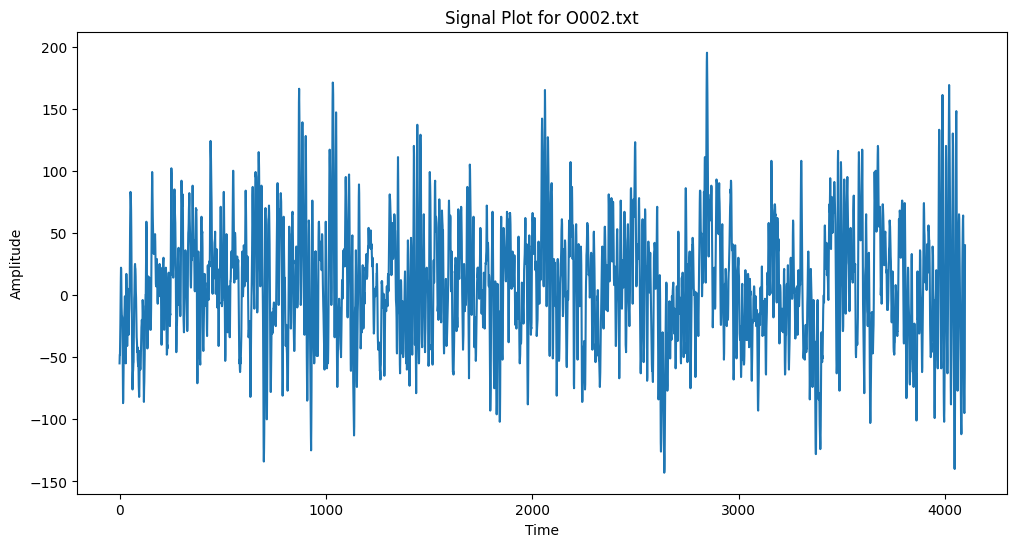

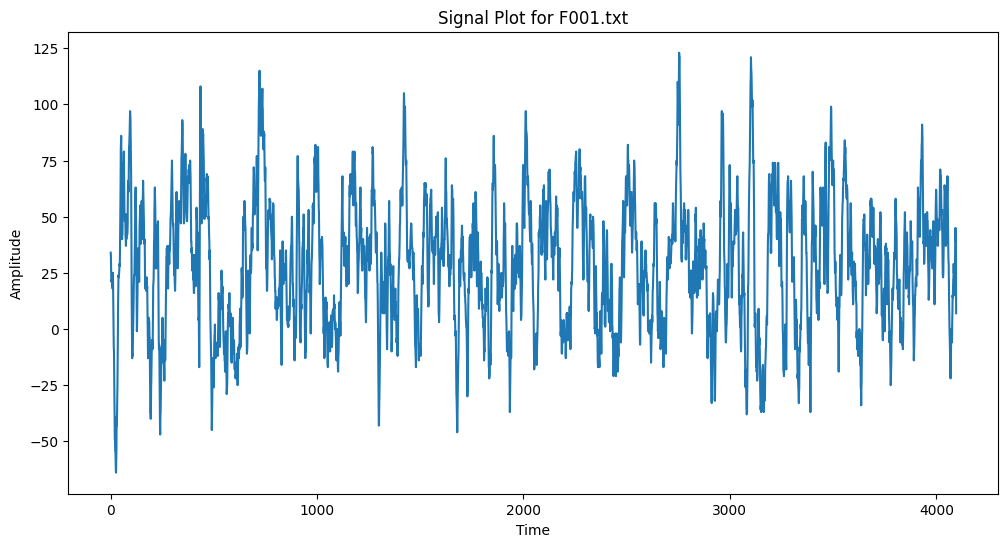

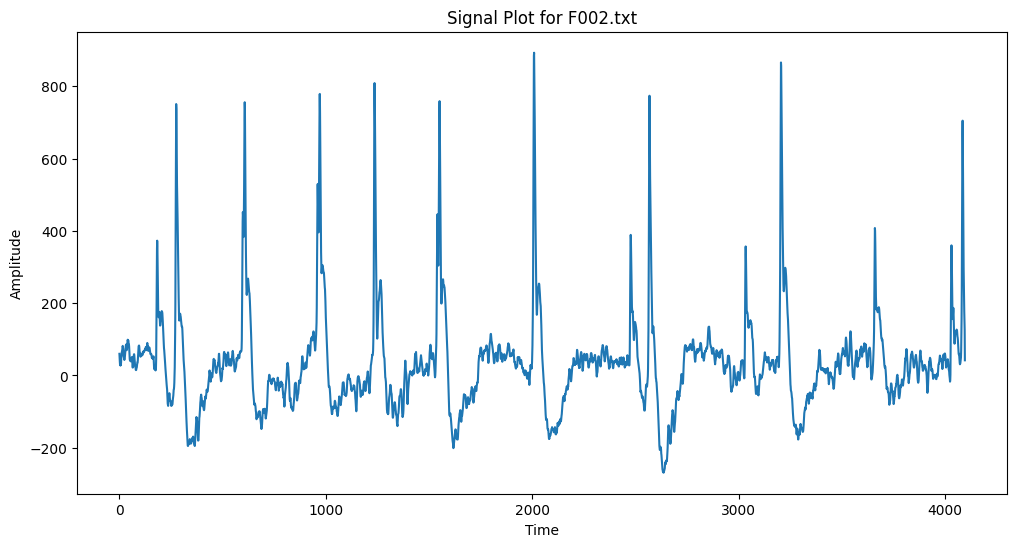

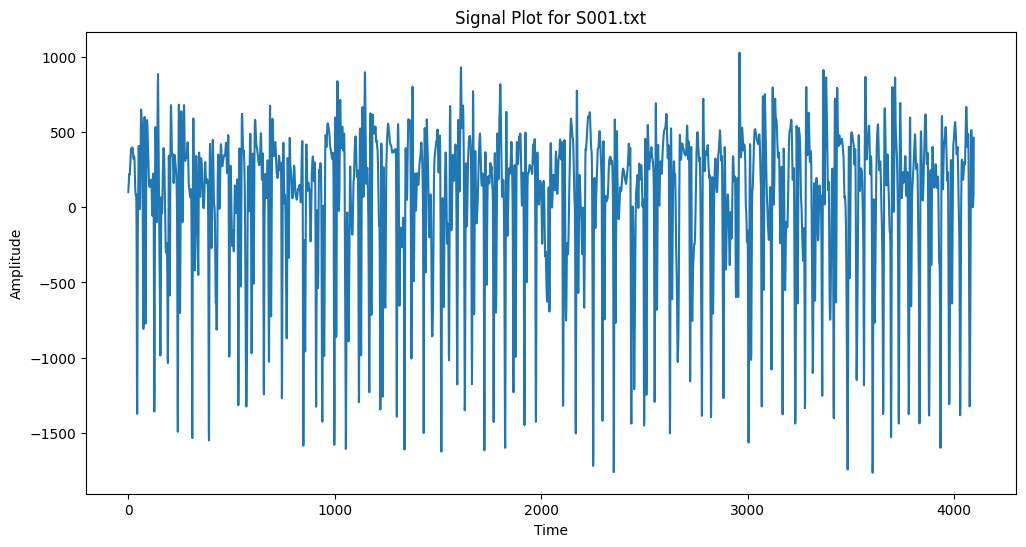

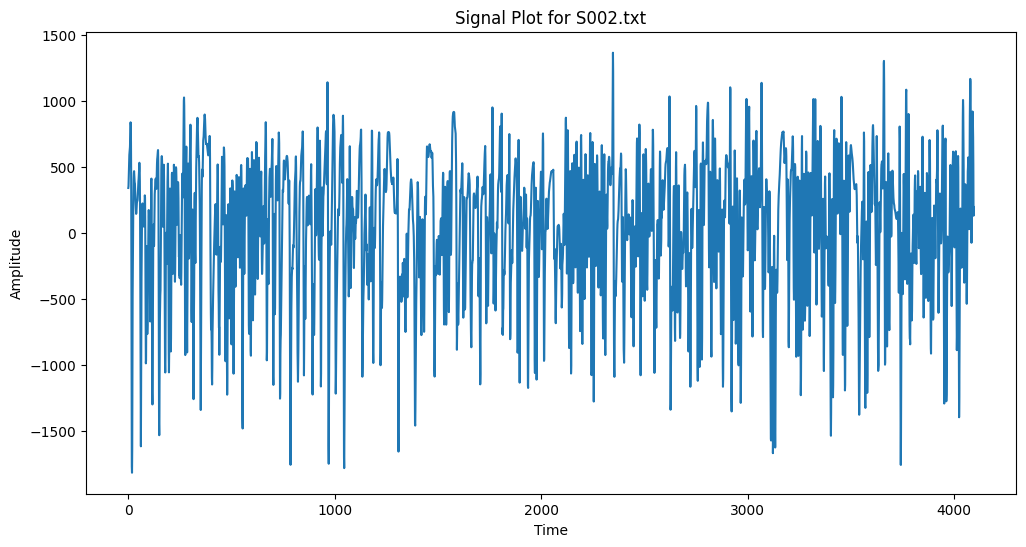

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

def explore_data(base_folder_path, data_mapping):
    for target_folder, subfolder_name in data_mapping.items():
        folder_path = os.path.join(base_folder_path, target_folder, subfolder_name)

        for file_number in range(3):
            file_name = f"{subfolder_name}{file_number:03d}.txt"
            file_path = os.path.join(folder_path, file_name)

            if os.path.exists(file_path):
                data = np.loadtxt(file_path)

                plt.figure(figsize=(12, 6))
                plt.plot(data)
                plt.title(f'Signal Plot for {file_name}')
                plt.xlabel('Time')
                plt.ylabel('Amplitude')
                plt.show()

if __name__ == "__main__":

    base_folder_path = "/content/drive/MyDrive/ukbonn_data/"

    data_mapping = {
        "A": "Z",
        "B": "O",
        "C": "N",
        "D": "F",
        "E": "S"
    }

    explore_data(base_folder_path, data_mapping)


In [ ]:
import os
import numpy as np
from scipy import signal
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def preprocess_eeg_data(base_folder_path, data_mapping):
    for target_folder, subfolder_name in data_mapping.items():
        folder_path = os.path.join(base_folder_path, target_folder, subfolder_name)

        for file_number in range(1, 101):
            if target_folder == "C":
                file_name = f"{subfolder_name}{file_number:03d}.TXT"
            else:
                file_name = f"{subfolder_name}_preprocessed_{file_number:03d}.txt"

            file_path = os.path.join(folder_path, file_name)

            if os.path.exists(file_path):
                data = np.loadtxt(file_path)


                imputer = SimpleImputer(strategy='mean')
                data_imputed = imputer.fit_transform(data.reshape(-1, 1)).flatten()

                fs = 173.61
                lowcut = 0.5
                highcut = 50.0
                order = 4
                b, a = signal.butter(order, [lowcut, highcut], btype='band', fs=fs)
                data_filtered = signal.filtfilt(b, a, data_imputed)

                # Standardize
                scaler = StandardScaler()
                data_standardized = scaler.fit_transform(data_filtered.reshape(-1, 1)).flatten()

                preprocessed_file_name = f"{subfolder_name}_preprocessed_{file_number:03d}.txt"
                preprocessed_file_path = os.path.join(folder_path, preprocessed_file_name)
                np.savetxt(preprocessed_file_path, data_standardized)
                print(f"Processed and saved data from: {file_path}")
                print(f"Saved preprocessed data to: {preprocessed_file_path}")
            else:
                print(f"File not found: {file_path}")

if __name__ == "__main__":

    base_folder_path = "/content/drive/MyDrive/ukbonn_data/"


    data_mapping = {
        "A": "Z",
        "B": "O",
        "C": "N",
        "D": "F",
        "E": "S"
    }

    preprocess_eeg_data(base_folder_path, data_mapping)


Processed and saved data from: /content/drive/MyDrive/ukbonn_data/A/Z/Z_preprocessed_001.txt
Saved preprocessed data to: /content/drive/MyDrive/ukbonn_data/A/Z/Z_preprocessed_001.txt
Processed and saved data from: /content/drive/MyDrive/ukbonn_data/A/Z/Z_preprocessed_002.txt
Saved preprocessed data to: /content/drive/MyDrive/ukbonn_data/A/Z/Z_preprocessed_002.txt
Processed and saved data from: /content/drive/MyDrive/ukbonn_data/A/Z/Z_preprocessed_003.txt
Saved preprocessed data to: /content/drive/MyDrive/ukbonn_data/A/Z/Z_preprocessed_003.txt
Processed and saved data from: /content/drive/MyDrive/ukbonn_data/A/Z/Z_preprocessed_004.txt
Saved preprocessed data to: /content/drive/MyDrive/ukbonn_data/A/Z/Z_preprocessed_004.txt
Processed and saved data from: /content/drive/MyDrive/ukbonn_data/A/Z/Z_preprocessed_005.txt
Saved preprocessed data to: /content/drive/MyDrive/ukbonn_data/A/Z/Z_preprocessed_005.txt
Processed and saved data from: /content/drive/MyDrive/ukbonn_data/A/Z/Z_preprocessed_

this code block calls the function to initiate the exploration and visualization of preprocessed EEG signals.

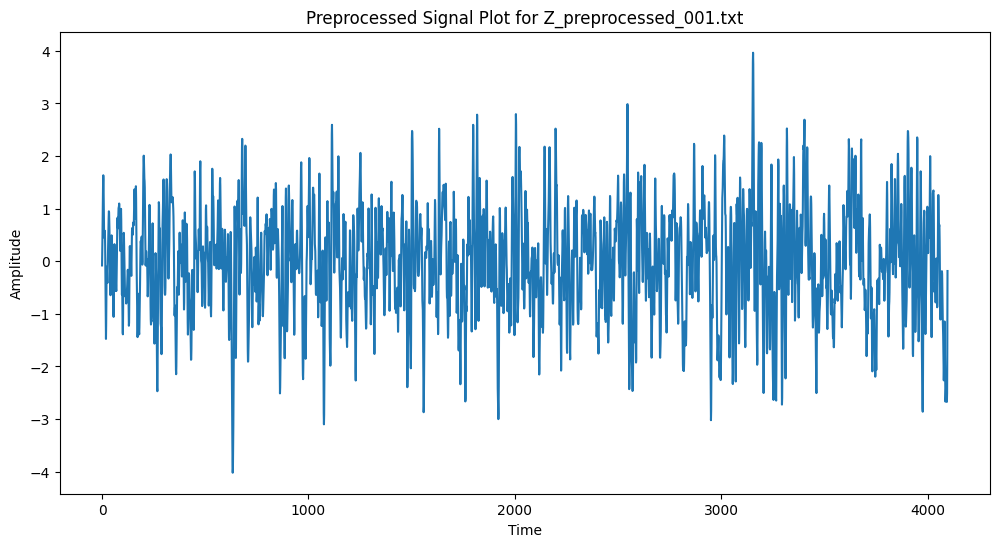

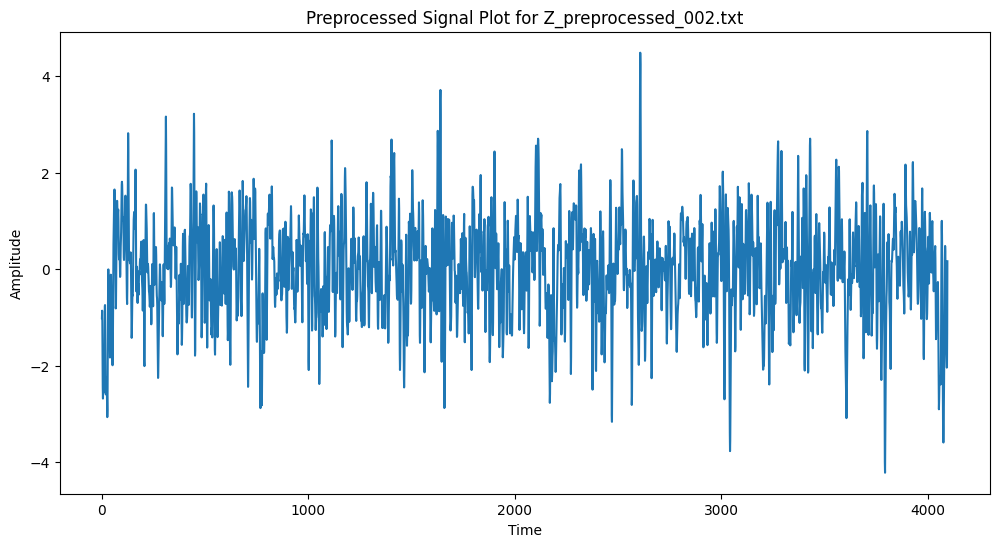

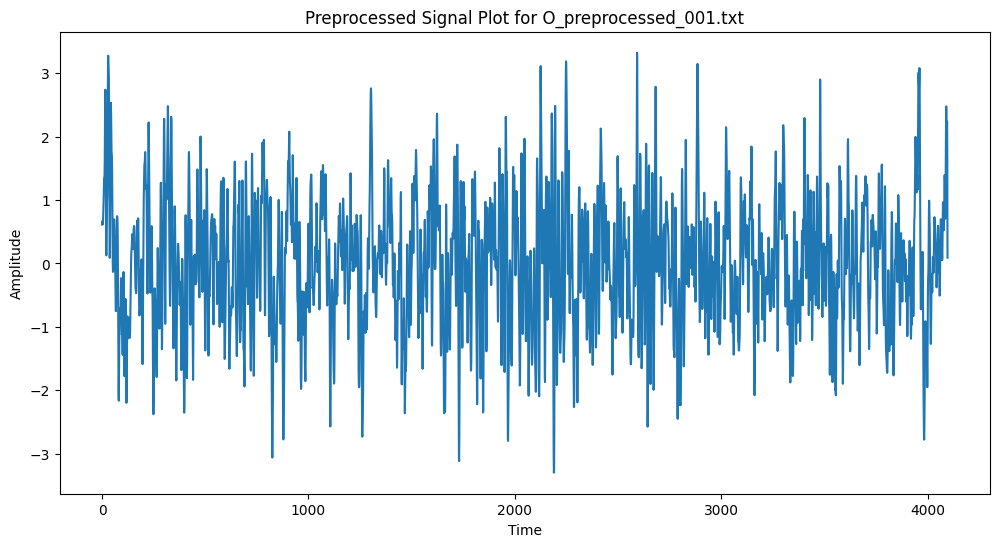

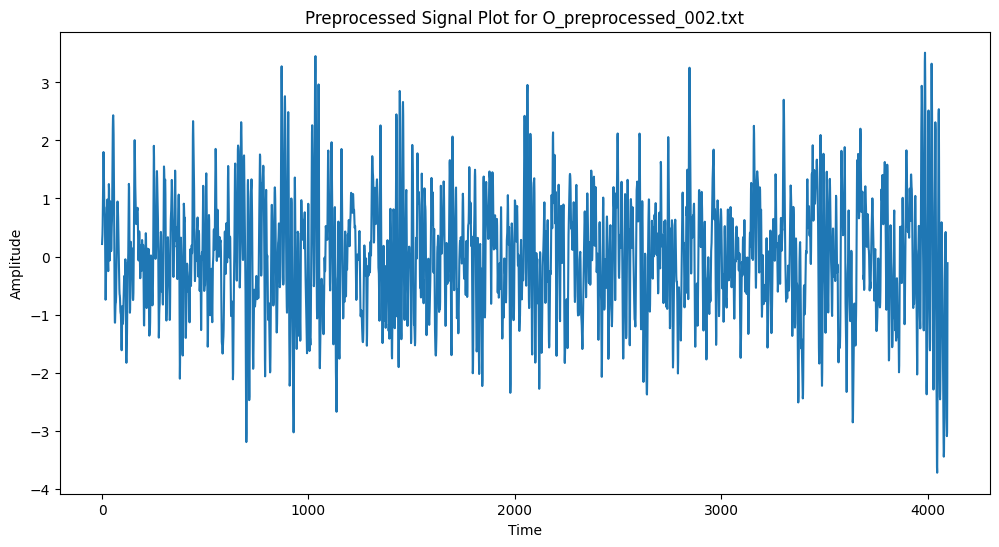

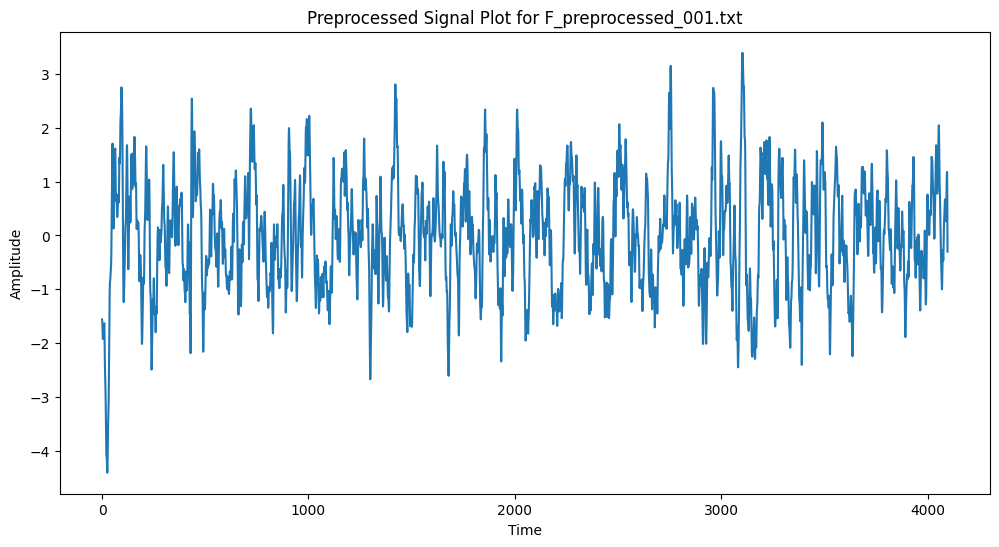

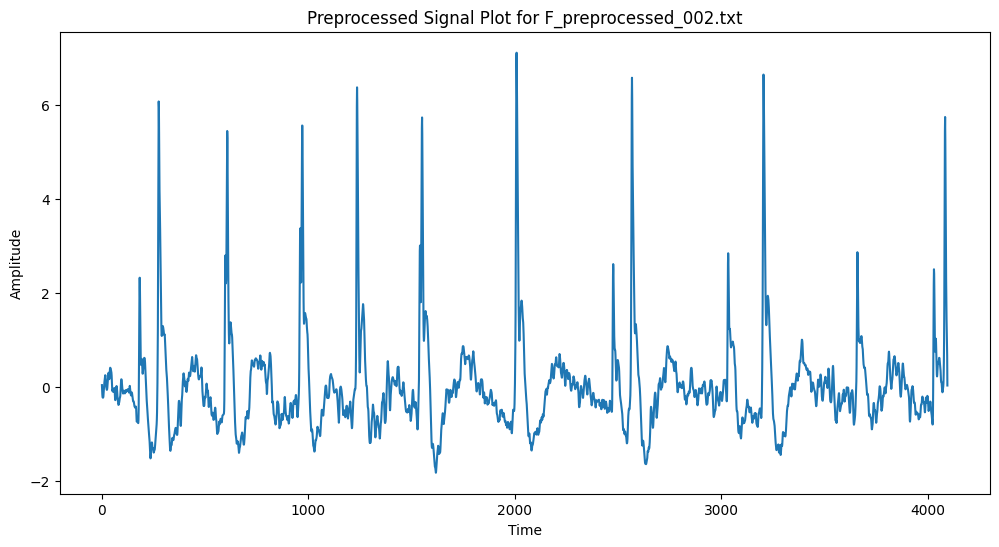

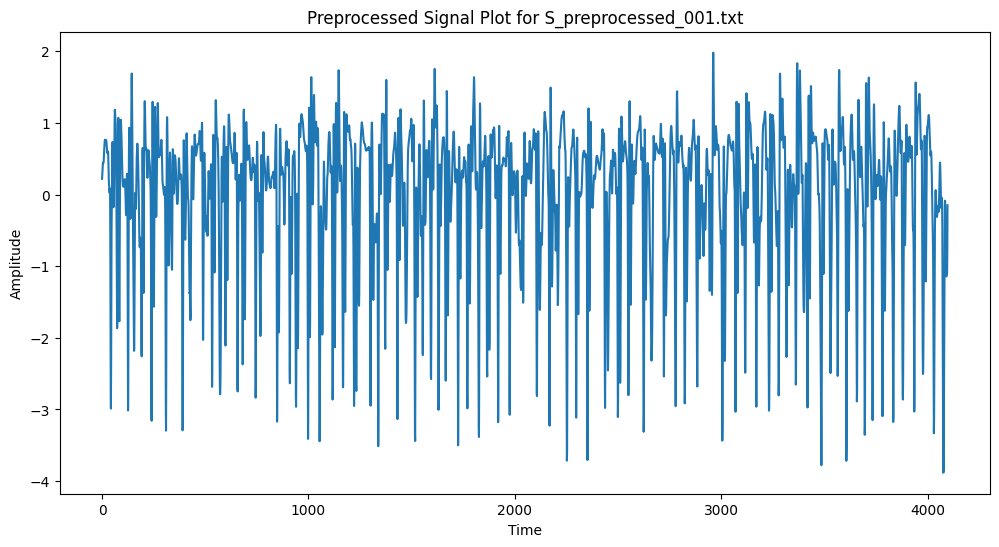

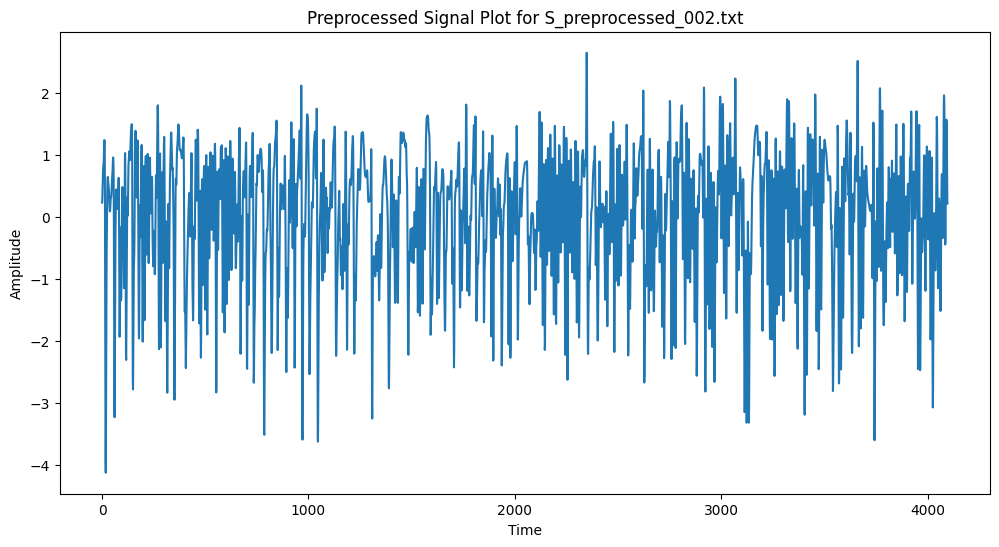

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

def explore_preprocessed_data(base_folder_path, data_mapping):
    for target_folder, subfolder_name in data_mapping.items():
        if target_folder == "C":
            continue

        folder_path = os.path.join(base_folder_path, target_folder, subfolder_name)

        for file_number in range(3):
            preprocessed_file_name = f"{subfolder_name}_preprocessed_{file_number:03d}.txt"
            preprocessed_file_path = os.path.join(folder_path, preprocessed_file_name)

            if os.path.exists(preprocessed_file_path):
                preprocessed_data = np.loadtxt(preprocessed_file_path)

                plt.figure(figsize=(12, 6))
                plt.plot(preprocessed_data)
                plt.title(f'Preprocessed Signal Plot for {preprocessed_file_name}')
                plt.xlabel('Time')
                plt.ylabel('Amplitude')
                plt.show()

if __name__ == "__main__":

    base_folder_path = "/content/drive/MyDrive/ukbonn_data/"


    data_mapping = {
        "A": "Z",
        "B": "O",
        "C": "N",
        "D": "F",
        "E": "S"
    }

    explore_preprocessed_data(base_folder_path, data_mapping)


UMAP-based Data Preprocessing:

This code defines a function preprocess_umap designed for dimensionality reduction and feature extraction using the Uniform Manifold Approximation and Projection (UMAP) algorithm.

In [ ]:
!pip install umap-learn

In [ ]:
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from umap import umap_ as UMAP

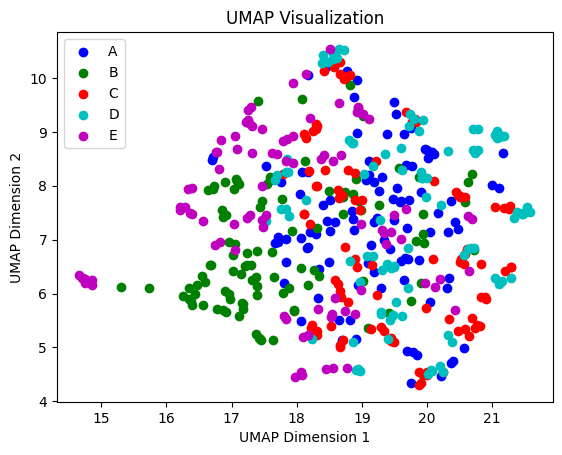

In [ ]:
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from umap import UMAP
import matplotlib.pyplot as plt

def extract_features_umap(base_folder_path, data_mapping):
    all_data = []

    for target_folder, subfolder_name in data_mapping.items():
        folder_path = os.path.join(base_folder_path, target_folder, subfolder_name)
        folder_data = []

        for file_number in range(101):
            preprocessed_file_name = f"{subfolder_name}_preprocessed_{file_number:03d}.txt"
            preprocessed_file_path = os.path.join(folder_path, preprocessed_file_name)

            if os.path.exists(preprocessed_file_path):

                preprocessed_data = np.loadtxt(preprocessed_file_path)
                folder_data.append(preprocessed_data)

        if folder_data:
            all_data.append(np.vstack(folder_data))
        else:
            print(f"No data found for folder {target_folder}")

    if all_data:

        stacked_data = np.vstack(all_data)


        scaler = StandardScaler()
        standardized_data = scaler.fit_transform(stacked_data)


        umap = UMAP(n_components=2)
        umap_data = umap.fit_transform(standardized_data)

        visualize_umap(umap_data, data_mapping)

        return umap_data
    else:
        print("No data found for any folder.")
        return None

def visualize_umap(umap_data, data_mapping):
    colors = ['b', 'g', 'r', 'c', 'm']

    for i, (target_folder, subfolder_name) in enumerate(data_mapping.items()):
        start_index = i * 101
        end_index = start_index + 101

        folder_umap_data = umap_data[start_index:end_index, :]

        plt.scatter(folder_umap_data[:, 0], folder_umap_data[:, 1], label=target_folder, color=colors[i])

    plt.title('UMAP Visualization')
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.legend()
    plt.show()

if __name__ == "__main__":

    base_folder_path = "/content/drive/MyDrive/ukbonn_data/"


    data_mapping = {
        "A": "Z",
        "B": "O",
        "C": "N",
        "D": "F",
        "E": "S"
    }

    umap_data = extract_features_umap(base_folder_path, data_mapping)


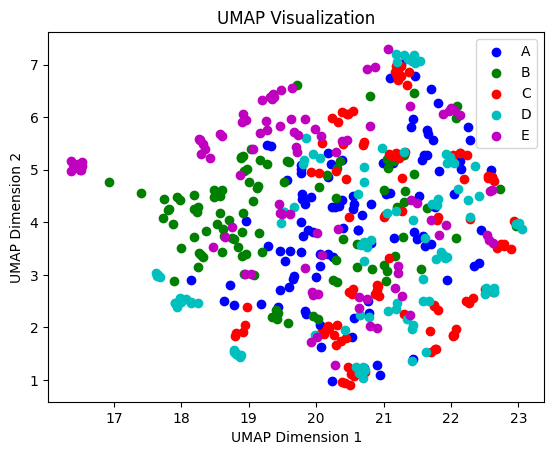

Labels: ['F' 'N' 'O' 'S' 'Z']
X_train shape: (300, 2)
X_val shape: (100, 2)
X_test shape: (100, 2)
y_train shape: (300,)
y_val shape: (100,)
y_test shape: (100,)


In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def split_data(umap_data, target_folders, num_samples_per_folder=100):

    label_encoder = LabelEncoder()
    y = np.repeat(label_encoder.fit_transform(target_folders), num_samples_per_folder)


    num_samples_expected = len(target_folders) * num_samples_per_folder
    if len(umap_data) != num_samples_expected:
        raise ValueError(f"Expected {num_samples_expected} samples, but got {len(umap_data)} samples.")


    X_train, X_temp, y_train, y_temp = train_test_split(umap_data, y, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test, label_encoder.classes_


if __name__ == "__main__":

    base_folder_path = "/content/drive/MyDrive/ukbonn_data/"


    data_mapping = {
        "A": "Z",
        "B": "O",
        "C": "N",
        "D": "F",
        "E": "S"
    }

    umap_data = extract_features_umap(base_folder_path, data_mapping)

    target_folders = list(data_mapping.values())
    X_train, X_val, X_test, y_train, y_val, y_test, labels = split_data(umap_data, target_folders)

    print("Labels:", labels)
    print("X_train shape:", X_train.shape)
    print("X_val shape:", X_val.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_val shape:", y_val.shape)
    print("y_test shape:", y_test.shape)



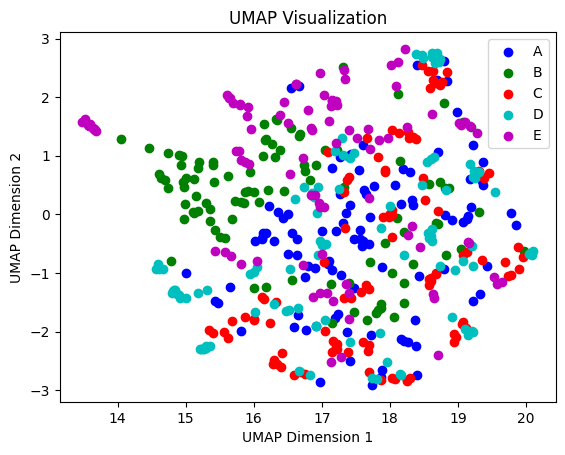

Updated Labels: dict_values(['D', 'C', 'B', 'E', 'A'])
X_train shape: (300, 2)
X_val shape: (100, 2)
X_test shape: (100, 2)
y_train shape: (300,)
y_val shape: (100,)
y_test shape: (100,)


In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def split_data(umap_data, target_folders, num_samples_per_folder=100):

    label_encoder = LabelEncoder()
    y = np.repeat(label_encoder.fit_transform(target_folders), num_samples_per_folder)


    num_samples_expected = len(target_folders) * num_samples_per_folder
    if len(umap_data) != num_samples_expected:
        raise ValueError(f"Expected {num_samples_expected} samples, but got {len(umap_data)} samples.")


    X_train, X_temp, y_train, y_temp = train_test_split(umap_data, y, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test, label_encoder.classes_

if __name__ == "__main__":

    base_folder_path = "/content/drive/MyDrive/ukbonn_data/"

    data_mapping = {
        "A": "Z",
        "B": "O",
        "C": "N",
        "D": "F",
        "E": "S"
    }

    umap_data = extract_features_umap(base_folder_path, data_mapping)


    target_folders = list(data_mapping.values())
    X_train, X_val, X_test, y_train, y_val, y_test, labels = split_data(umap_data, target_folders)

    label_encoder = LabelEncoder()
    label_encoder.fit(labels)

    label_mapping = {
        "F": "D",
        "N": "C",
        "O": "B",
        "S": "E",
        "Z": "A"
    }
    y_train_mapped = np.array([label_mapping[label] for label in label_encoder.inverse_transform(y_train)])
    y_val_mapped = np.array([label_mapping[label] for label in label_encoder.inverse_transform(y_val)])
    y_test_mapped = np.array([label_mapping[label] for label in label_encoder.inverse_transform(y_test)])

    print("Updated Labels:", label_mapping.values())
    print("X_train shape:", X_train.shape)
    print("X_val shape:", X_val.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train_mapped.shape)
    print("y_val shape:", y_val_mapped.shape)
    print("y_test shape:", y_test_mapped.shape)


LSTM (Long Short-Term Memory) Model:

This code is designed for preprocessing data specifically tailored for training models based on Long Short-Term Memory networks (LSTMs). The primary goal is to prepare sequential data in a format suitable for training models that can capture temporal dependencies, making it well-suited for tasks such as time series analysis or sequence classification.

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from itertools import cycle

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

def preprocess_rnn_lstm(base_folder_path, data_mapping):
    all_sequences = []
    all_labels = []

    for target_folder, subfolder_name in data_mapping.items():
        if target_folder == "C":
            continue

        folder_path = os.path.join(base_folder_path, target_folder, subfolder_name)
        all_sequences = []
        all_labels = []

        for file_number in range(101):
            file_name = f"{target_folder}_preprocessed_{file_number:03d}.txt"
            file_path = os.path.join(folder_path, file_name)

            if os.path.exists(file_path):

                data = np.loadtxt(file_path)


                sequence_length = 256
                step = 128
                sequences = [data[i:i + sequence_length] for i in range(0, len(data) - sequence_length, step)]


                labels = np.full(len(sequences), int(subfolder_name, 36) - 10)

                all_sequences.extend(sequences)
                all_labels.extend(labels)

    X = np.array(all_sequences)
    y = np.array(all_labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

if __name__ == "__main__":
    base_folder_path = "/content/drive/MyDrive/ukbonn_data/"
    data_mapping = {
        "A": "Z",
        "B": "O",
        "C": "N",
        "D": "F",
        "E": "S"
    }

    X_train, X_test, y_train, y_test = preprocess_rnn_lstm(base_folder_path, data_mapping)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)


model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train_onehot, epochs=10, batch_size=32, validation_data=(X_test, y_test_onehot))

loss, accuracy = model.evaluate(X_test, y_test_onehot)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


78/78 [==============================] - 10s 103ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
78/78 [==============================] - 8s 104ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
78/78 [==============================] - 8s 108ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
78/78 [==============================] - 7s 88ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
78/78 [==============================] - 8s 106ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
78/78 [==============================] - 7s 88ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
78/78 [==============================] - 8s 105ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_lo

(The high accuracy can be caused by overfitting of the data)

Sample signal testing


In [ ]:
import numpy as np

new_input_data_path = "/content/drive/MyDrive/ukbonn_data/A/Z/A_preprocessed_001.txt"

new_input_data = np.loadtxt(new_input_data_path)

predictions = model.predict(new_input_data_reshaped)

predicted_class_index = np.argmax(predictions)

class_labels = ["Class_A", "Class_B", "Class_C", "Class_D", "Class_E"]
predicted_class_label = class_labels[predicted_class_index]
print(f"Predicted Class Label: {predicted_class_label}")

print(predictions)
if predicted_class_label in ["Class_A", "Class_B"]:
    print("Healthy")
else:
    print("Not Healthy")

1/1 [==============================] - 0s 43ms/step
Predicted Class Label: Class_A
[[1.]]
Healthy


As per the dataset and the reference paper, the signals in the folder A and B are healthy while others are epilepsy signals. Our model is thus correctly taking the input image and identifying which type of signal it is.